In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline


In [4]:
# Read the data from the file "Advertising.csv"
filename = 'Advertising.csv'
df_adv = pd.read_csv(filename)


In [5]:
# Take a quick look of the dataset
df_adv.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Part 1: KNN by hand for $k=1$

In [6]:
# Get a subset of the data i.e. rows 5 to 13
# Use the TV column as the predictor
x_true = df_adv.TV.iloc[5:13]

# Use the Sales column as the response
y_true = df_adv.Sales.iloc[5:13]

# Sort the data to get indices ordered from lowest to highest TV values
idx = np.argsort(x_true).values 

# Get the predictor data in the order given by idx above
x_true  = x_true.iloc[idx].values

# Get the response data in the order given by idx above
y_true  = y_true.iloc[idx].values


In [7]:
### edTest(test_findnearest) ###
# Define a function that finds the index of the nearest neighbor 
# and returns the value of the nearest neighbor.  
# Note that this is just for k = 1 where the distance function is 
# simply the absolute value.

def find_nearest(array,value):
    
    # Hint: To find idx, use .idxmin() function on the series
    idx = pd.Series(np.abs(array-value)).idxmin() 

    # Return the nearest neighbor index and value
    return idx, array[idx]


In [8]:
# Create some synthetic x-values (might not be in the actual dataset)
x = np.linspace(np.min(x_true), np.max(x_true))

# Initialize the y-values for the length of the synthetic x-values to zero
y = np.zeros((len(x)))


In [9]:
# Apply the KNN algorithm to predict the y-value for the given x value
for i, xi in enumerate(x):

    # Get the Sales values closest to the given x value
    y[i] = y_true[find_nearest(x_true, xi )[0]]


### Plotting the data

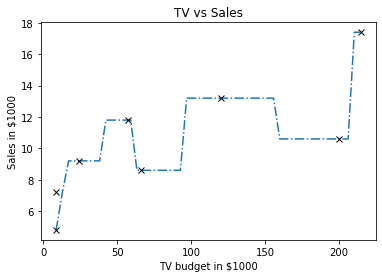

In [10]:
# Plot the synthetic data along with the predictions    
plt.plot(x, y, '-.')

# Plot the original data using black x's.
plt.plot(x_true,y_true , 'kx')

# Set the title and axis labels
plt.title('TV vs Sales')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')
plt.show()


## Part 2: KNN for $k\ge1$ using sklearn

In [11]:
# Read the data from the file "Advertising.csv"
data_filename = 'Advertising.csv'
df = pd.read_csv(data_filename)

# Set 'TV' as the 'predictor variable'   
x = df[['TV']]

# Set 'Sales' as the response variable 'y' 
y = df['Sales']


In [12]:
### edTest(test_shape) ###

# Split the dataset in training and testing with 60% training set 
# and 40% testing set with random state = 42
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.6,random_state=42)


In [16]:
### edTest(test_nums) ###

# Choose the minimum k value based on the instructions given on the left
k_value_min = np.min(1)

# Choose the maximum k value based on the instructions given on the left
k_value_max = np.max(70)


# Create a list of integer k values betwwen k_value_min and k_value_max using linspace
k_list = np.linspace(k_value_min, k_value_max, 70)


/usr/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


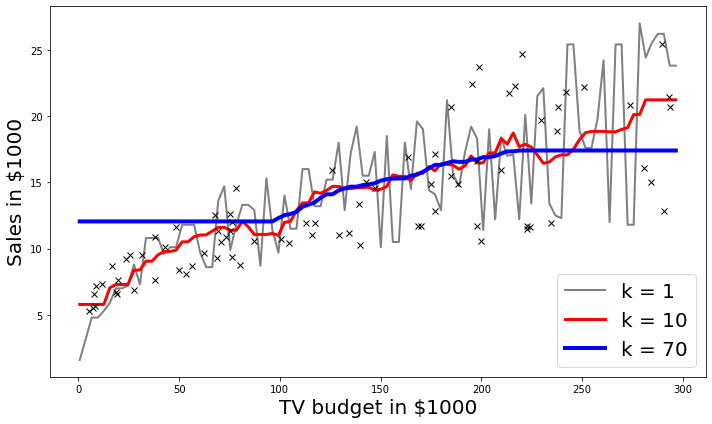

In [20]:
# Set the grid to plot the values
fig, ax = plt.subplots(figsize=(10,6))

# Variable used to alter the linewidth of each plot
j=0

# Loop over all the k values
for k_value in k_list:   
    
    # Creating a kNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fitting the regression model on the training data 
    model.fit(x_train,y_train)
    
    # Use the trained model to predict on the test data 
    y_pred = model.predict(x_test)
    
    # Helper code to plot the data along with the model predictions
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_test.values, y_test.values,'x',label='train',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()


#### ⏸ In the plotting code above, re-run `ax.plot(x_train, y_train,'x',label='train',color='k')` with `x_test` and `y_test` instead. According to you, which k value is the best and why?

In [21]:
### edTest(test_chow1) ###
# Type your answer within in the quotes given
answer1 = '1'
